In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
sus17 = pd.read_csv("https://opendata.arcgis.com/datasets/378681361694476ea91d3ca3cb7545e6_0.csv?outSR=%7B%22latestWkid%22%3A2248%2C%22wkid%22%3A102685%7D")
crime16 = pd.read_csv("https://opendata.arcgis.com/datasets/e2e574dd350746028e2607c841fed05d_0.csv?outSR=%7B%22latestWkid%22%3A2248%2C%22wkid%22%3A102685%7D")
arts17 = pd.read_csv("https://opendata.arcgis.com/datasets/8c15b02d6c5341218caa29426ed95130_0.csv?outSR=%7B%22latestWkid%22%3A2248%2C%22wkid%22%3A102685%7D")
house17 = pd.read_csv("https://opendata.arcgis.com/datasets/52e6aa20012447b982cf33d17c33c9a0_0.csv?outSR=%7B%22latestWkid%22%3A2248%2C%22wkid%22%3A102685%7D")

In [0]:
project = pd.merge(pd.merge(sus17, crime16, on ='CSA2010'),pd.merge(arts17, house17, on= 'CSA2010'))
project.head()

,OBJECTID_x,CSA2010,dirtyst17,clogged17,drvalone17,carpool17,pubtran17,walked17,trav14_17,trav29_17,trav44_17,trav45_17,trees17,heatgas17,elheat17,novhcl17,wlksc17,busload17,othrcom17,treeplnt17,Shape__Area_x,Shape__Length_x,OBJECTID_y,crime16,viol16,prop16,shoot16,gunhom16,caslt16,narc16,arrest16,lights16,Shape__Area_y,Shape__Length_y,libcard17,artevnt17,artbus17,artemp17,cebus17,ceemp17,salepr17,dom17,shomes17,ownroc17,fore17,vacant17,vio17,resrehab17,totalres17,cashsa17,reosa17,taxlien17,demper17,constper17,baltvac17,affordm17,affordr17,histax17,homtax17,owntax17,nomail17,hcvhouse17
0,1,Allendale/Irvington/S. Hilton,60.307085,3.946476,60.540622,16.173362,19.873150,1.615826,15.055874,40.048324,24.645122,20.250680,32.372913,65.128457,23.662248,29.651448,56.396,440.2790,1.797040,3,6.377046e+07,38770.165571,1,49.577604,15.600913,32.681754,3.144848,0.739964,53.092434,51.119196,15.662576,19.609052,6.377046e+07,38770.165571,229.882222,0.616637,0.061664,10,0.061664,1,55000.0,33.0,161,55.528212,1.458956,5.695201,4.148356,2.460889,5689,64.197531,1.234568,6.484099,0.703111,0.000000,1.234568,43.455985,45.896757,NaN,122.165583,66.971348,10.250191,226.671079
1,2,Beechfield/Ten Hills/West Hills,18.264840,3.913894,73.020156,14.775432,10.474528,1.444215,11.839391,43.437550,25.646723,19.076337,48.696974,68.732341,21.209267,18.515728,39.359,238.1770,0.285669,69,4.788253e+07,37524.950533,2,39.546641,8.398565,30.577299,0.733855,0.081539,36.774299,29.191129,7.909328,23.483366,4.788253e+07,37524.950533,178.082192,0.489237,0.081539,4,0.244618,8,139950.0,28.0,174,77.217295,1.635255,0.970067,2.743902,3.852550,3608,25.925926,0.462963,2.798559,0.000000,0.000000,5.714286,33.648069,42.915476,0.831486,283.813747,65.410200,3.138298,111.065741
2,3,Belair-Edison,76.423978,2.928342,58.490566,9.288824,29.221093,1.064344,8.869537,34.913724,23.205935,33.010805,20.827125,76.326194,13.822076,34.645799,67.667,356.2820,1.935172,182,4.495003e+07,31307.314843,3,52.767570,14.813964,36.920073,1.722554,0.574185,54.777216,28.020211,19.866789,20.785485,4.495003e+07,31307.314843,337.792834,0.574185,0.114837,12,0.401929,28,59075.0,28.5,208,58.071179,2.287893,3.749603,5.322529,3.050524,6294,53.623188,2.898551,4.511517,0.000000,0.000000,1.271186,40.082490,68.141593,0.158881,256.434700,64.346997,9.366816,373.605233
3,4,Brooklyn/Curtis Bay/Hawkins Point,82.286035,7.372042,58.354406,16.300331,21.318810,3.404007,12.565649,33.826104,29.060494,24.547753,14.631858,61.384581,32.074624,33.131041,19.737,384.6800,0.622447,459,1.760777e+08,150987.703639,4,80.390367,26.118093,53.499965,3.159447,0.702099,120.761076,62.205996,44.232254,13.129256,1.760777e+08,150987.703639,272.344309,0.210630,0.140420,25,0.351050,47,52000.0,32.0,155,40.329025,1.621622,7.050529,4.582844,1.128085,4255,69.306931,2.970297,7.028679,0.000000,0.235018,0.666667,23.497268,51.493599,NaN,113.043478,49.353702,14.613131,66.500711
4,5,Canton,42.592593,7.777778,81.797907,6.759307,3.190942,4.494768,17.773203,39.646595,28.615543,13.964659,12.516619,62.104731,33.316469,4.502909,87.762,62.4691,3.757077,8,1.540854e+07,23338.611948,5,45.555556,8.271605,37.160494,0.000000,0.000000,17.901235,3.950617,3.086420,21.975309,1.540854e+07,23338.611948,269.259259,7.777778,0.617284,9,2.098765,814,306500.0,25.0,327,66.889549,0.470530,0.421000,0.792472,8.023774,4038,14.438503,0.000000,1.040377,0.000000,0.247647,0.000000,20.201485,28.252300,72.065379,249.380882,53.244180,4.879506,10.512484


In [0]:
final = project.filter(['CSA2010', 'salepr17','vacant17', 'libcard17','crime16','dirtyst17','trees17','treeplnt17'])

Text(0.5, 1.0, 'Crime in Baltimore')

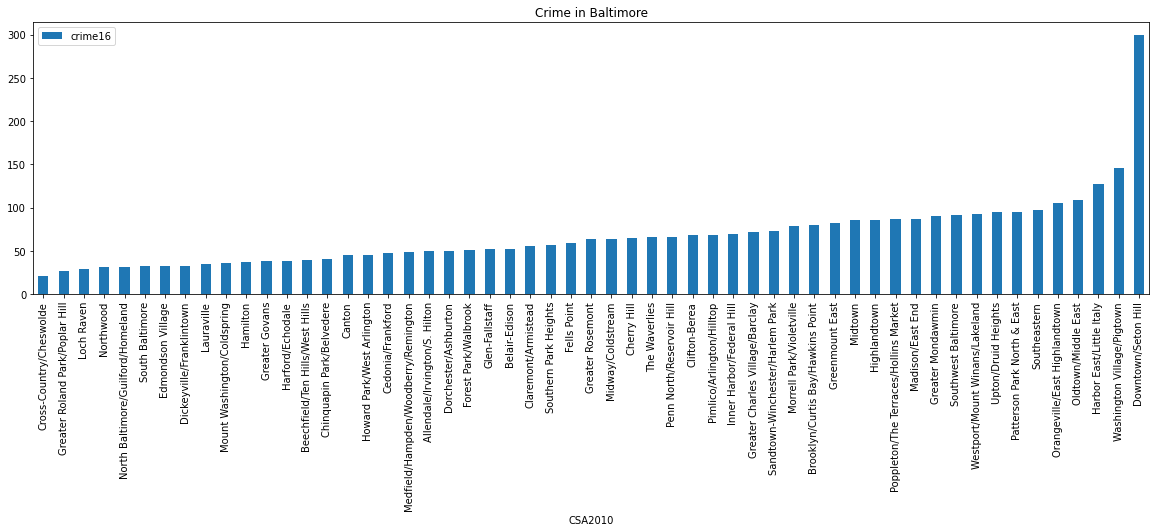

In [0]:
final.sort_values(by='crime16').plot.bar(x='CSA2010', y={'crime16'}, figsize=(20,5)).set_title('Crime in Baltimore')
#We see Downtown/Seton Hill as an outlier, with roughly twice as many incidents as the next area, Washington Village/Pigtown
#We will remove this row to get a cleaner look at the data
#We can also draw the conclusion that, because downtown is heavily occupied by businesses and offices, we are seeing a population that 
#may be largely residential, and thus differing from other neighborhoods greatly.

In [0]:
# Downtown/Seton Hill is at index 13, so we will drop this outlier
final = final.drop(final.index[13])

In [0]:
#Creating our dirty street/vacants dataframe.  
dirt_vac = final.filter(['CSA2010','dirtyst17','vacant17','crime16'])

dirt_vac['crime16'] = dirt_vac['crime16'].transform(func=lambda x:x/5)
dirt_vac['dirtyst17'] = dirt_vac['dirtyst17'].transform(func=lambda x:x/5)


In [0]:
dirt_vac.describe()

,dirtyst17,vacant17,crime16
count,54.000000,54.000000,54.000000
mean,13.628776,7.441754,12.728448
std,12.188859,9.566683,5.448287
min,0.629124,0.068470,4.296455
25%,5.124377,0.973353,7.962682
50%,9.637019,2.935192,12.360058
75%,15.402650,11.645502,16.954557
max,49.706458,35.133344,29.293113


Text(0.5, 1.0, 'Crime to Alley Sort')

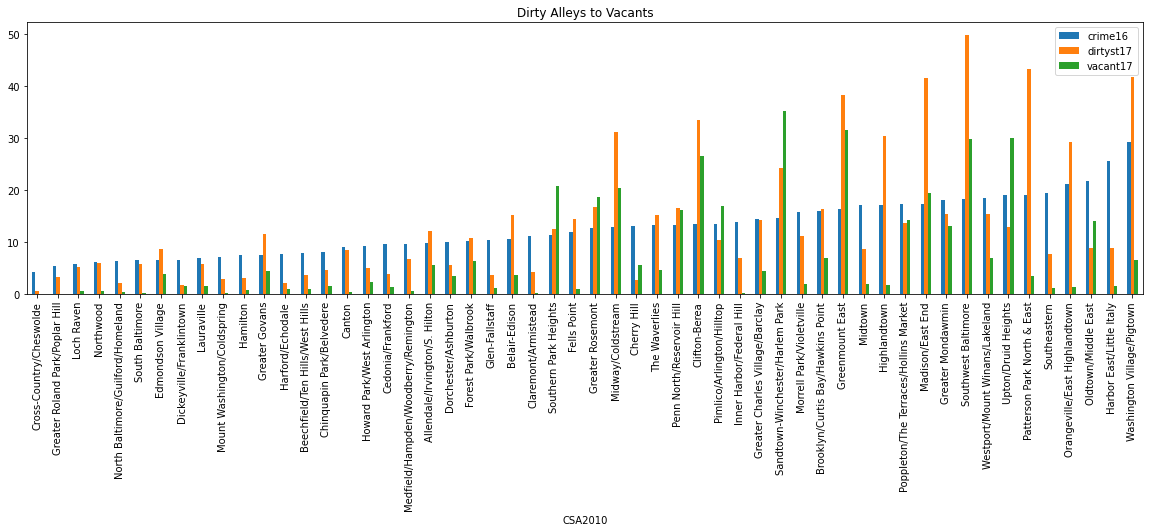

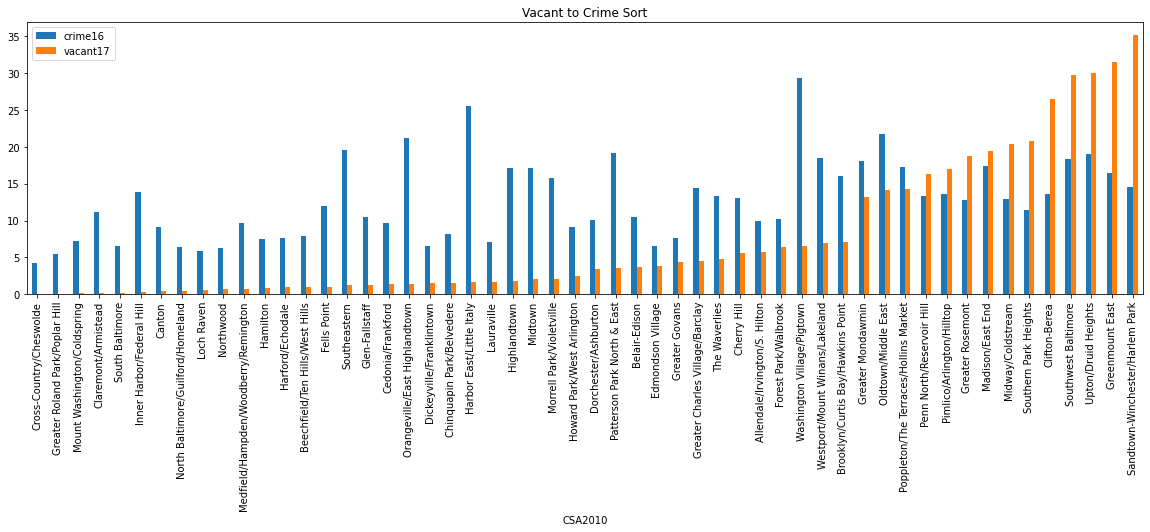

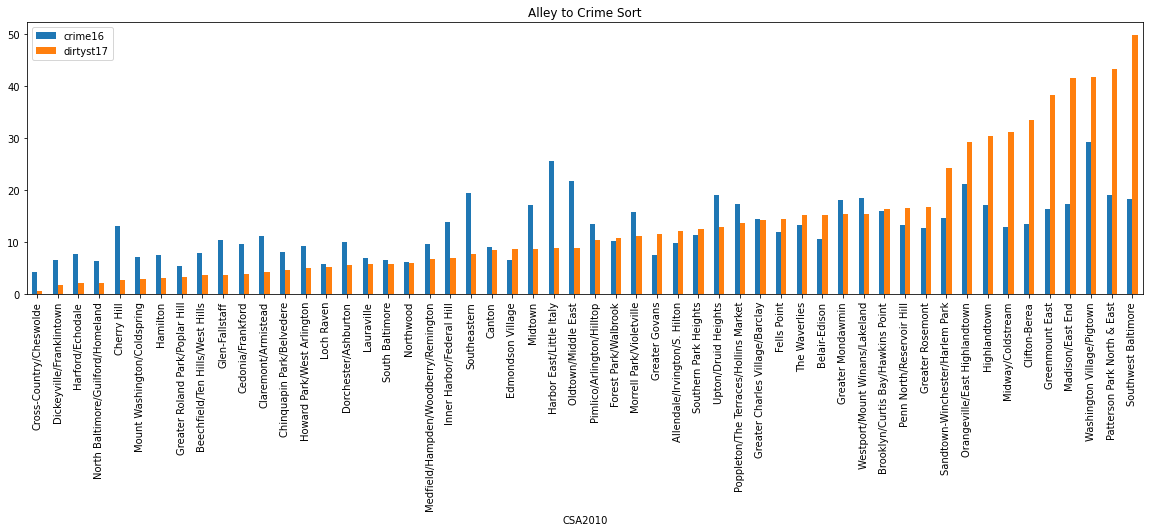

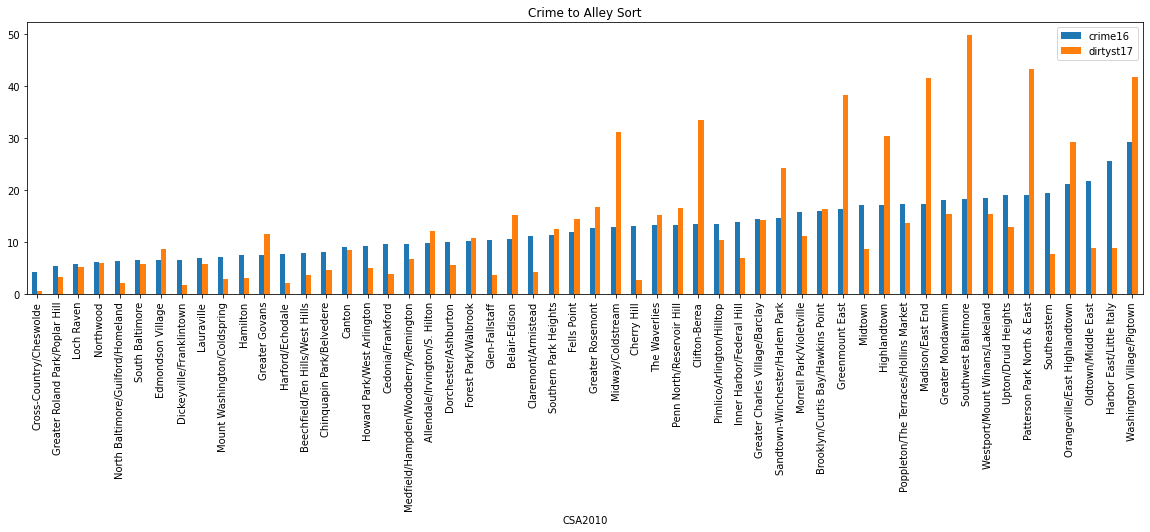

In [0]:
dirt_vac.sort_values(by='crime16').plot.bar(x='CSA2010',y={'crime16','dirtyst17','vacant17'}, figsize=(20,5)).set_title('Dirty Alleys to Vacants')
dirt_vac.sort_values(by='vacant17').plot.bar(x='CSA2010',y={'vacant17','crime16',}, figsize=(20,5)).set_title('Vacant to Crime Sort')
dirt_vac.sort_values(by='dirtyst17').plot.bar(x='CSA2010',y={'dirtyst17','crime16'}, figsize=(20,5)).set_title('Alley to Crime Sort')
dirt_vac.sort_values(by='crime16').plot.bar(x='CSA2010',y={'dirtyst17','crime16'}, figsize=(20,5)).set_title('Crime to Alley Sort')

In [0]:
dirtroll = dirt_vac.sort_values(by='dirtyst17')
dirtroll['Rolling']= dirtroll.iloc[:,3].rolling(window=3).mean()

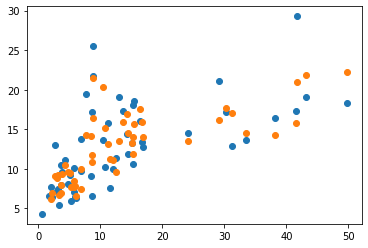

In [0]:
plt.scatter(dirtroll['dirtyst17'], dirtroll['crime16'],marker='o')
plt.scatter(dirtroll['dirtyst17'], dirtroll['Rolling'],marker='o')

In [0]:
trees_crime = final.filter(['CSA2010', 'trees17','treeplnt17', 'crime16'])
trees_crime['treeplnt17']=trees_crime['treeplnt17'].transform(func=lambda x:x/1.5)
#trees_crime['crime16']=trees_crime['crime16'].transform(func=lambda x:x/2)
trees_crime.describe()

,trees17,treeplnt17,crime16
count,54.000000,54.000000,54.000000
mean,26.092829,36.617284,63.642239
std,16.535650,64.012296,27.241435
min,4.147014,0.000000,21.482277
25%,12.924855,0.666667,39.813410
50%,22.845506,6.333333,61.800291
75%,32.457333,40.500000,84.772787
max,72.916314,306.000000,146.465564


Text(0.5, 1.0, 'Trees Planted (2017)')

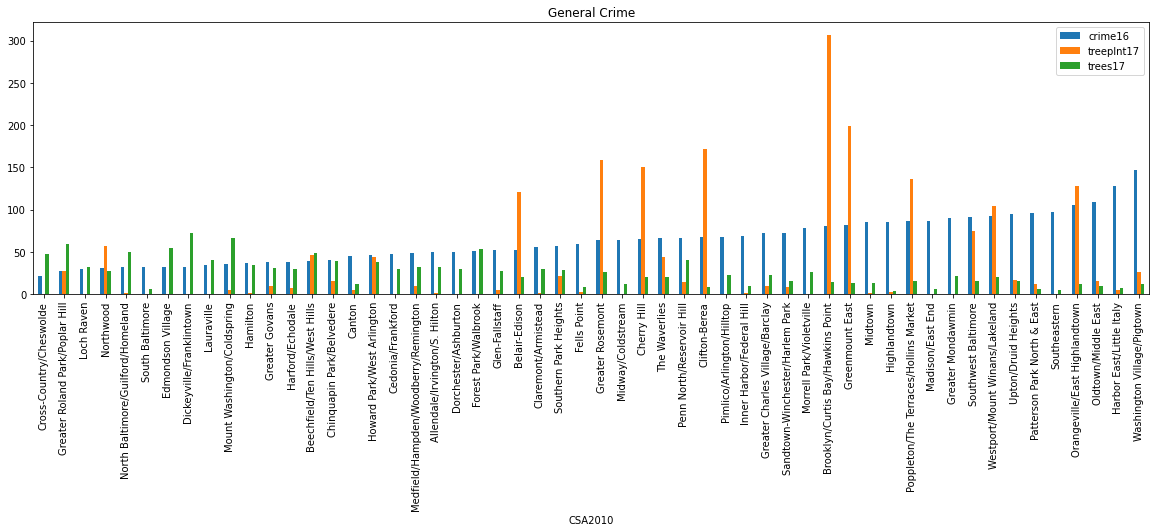

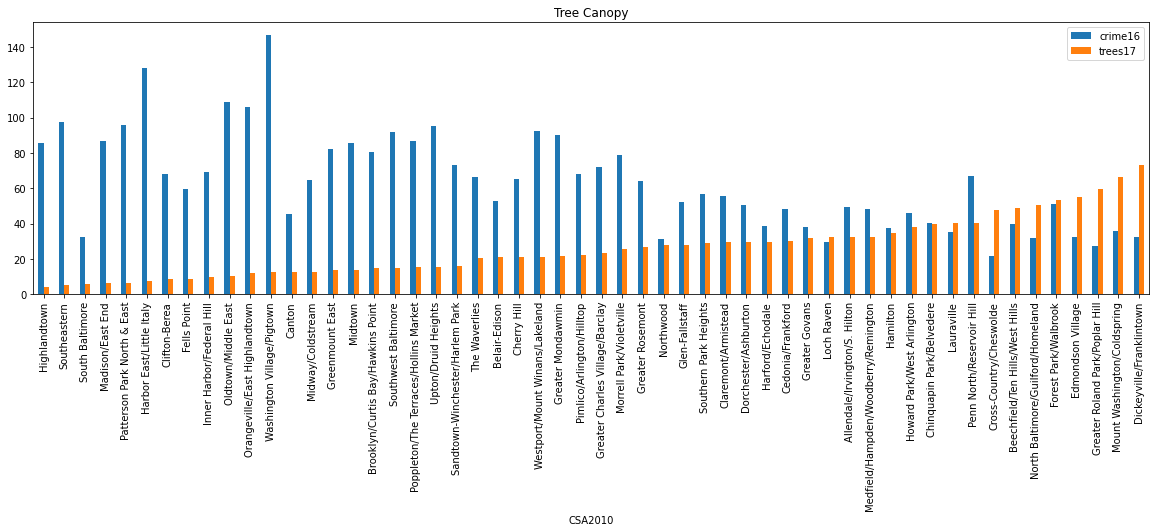

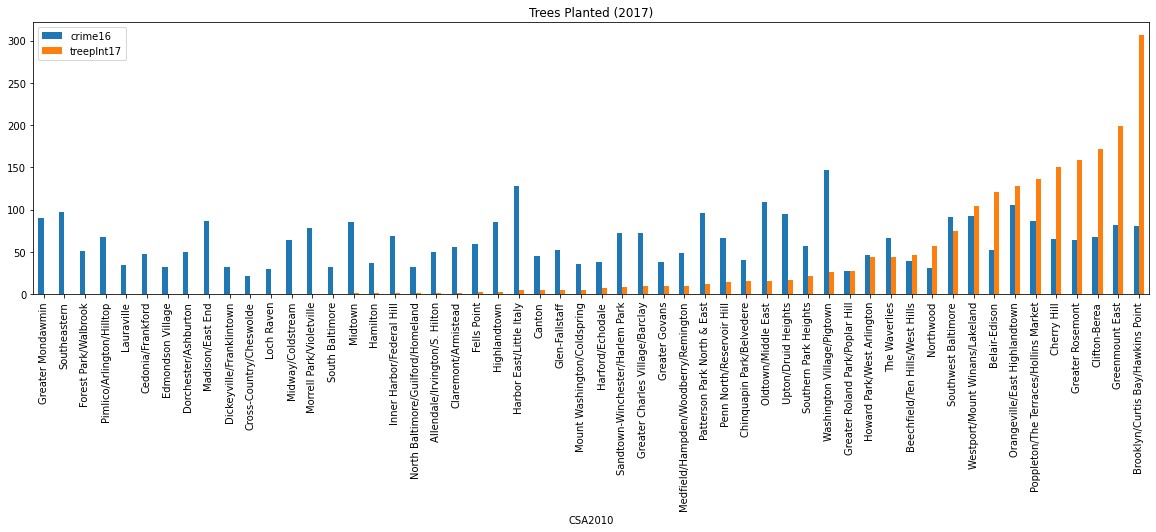

In [0]:
trees_crime.sort_values(by='crime16').plot.bar(x='CSA2010', y={'crime16','treeplnt17','trees17'}, figsize=(20, 5)).set_title('General Crime')
trees_crime.sort_values(by='trees17').plot.bar(x='CSA2010', y={'crime16','trees17',}, figsize=(20, 5)).set_title('Tree Canopy')
trees_crime.sort_values(by='treeplnt17').plot.bar(x='CSA2010', y={'crime16','treeplnt17'}, figsize=(20, 5)).set_title('Trees Planted (2017)')

In [0]:
treeroll = trees_crime.sort_values(by='trees17')
treeroll['Rolling']= treeroll.iloc[:,3].rolling(window=3).mean()

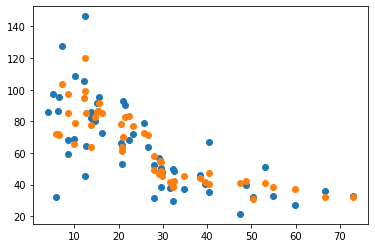

In [0]:
plt.scatter(treeroll['trees17'],treeroll['crime16'], marker='o')
plt.scatter(treeroll['trees17'],treeroll['Rolling'], marker='o')

In [0]:
#Creating house to crime dataframe
housecrime = final.filter(['CSA2010', 'salepr17', 'crime16'])
#Transforming sale price > a reduction factor of 5000, to better visualize relation to crime)
housecrime['salepr17'] = housecrime['salepr17'].transform(func=[lambda x:x/2200])
housecrime.describe()

,salepr17,crime16
count,54.000000,54.000000
mean,63.037458,63.642239
std,41.890089,27.241435
min,15.681818,21.482277
25%,32.659091,39.813410
50%,48.948864,61.800291
75%,82.784091,84.772787
max,171.590909,146.465564


Text(0.5, 1.0, 'Crime Sort')

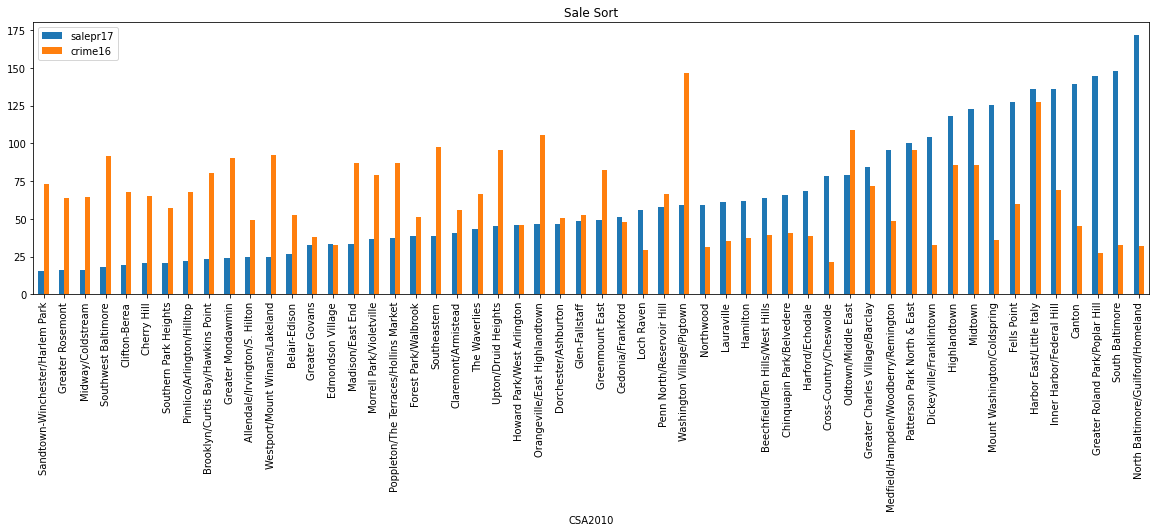

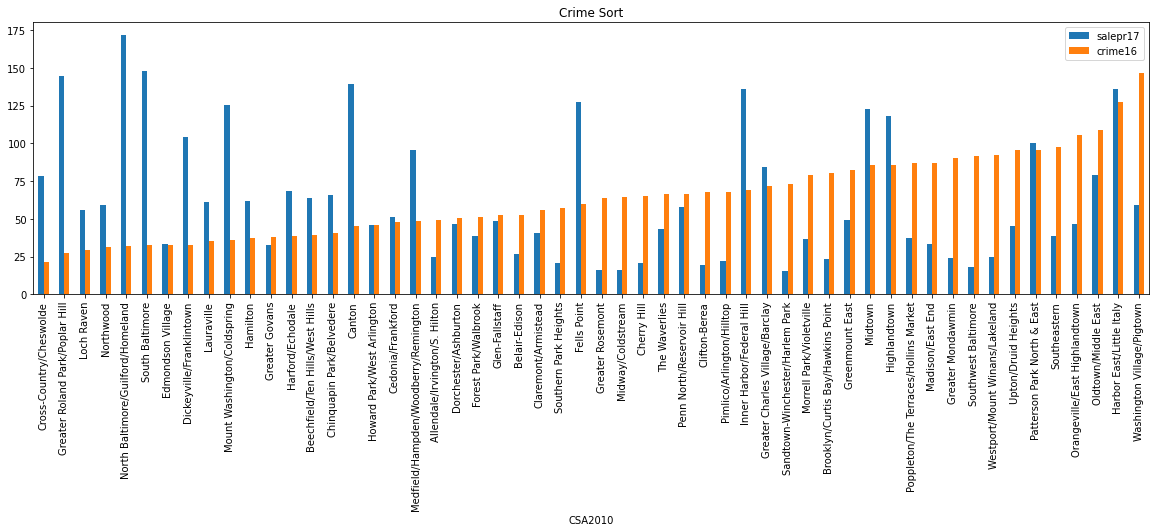

In [0]:
housecrime.sort_values(by='salepr17').plot.bar(x='CSA2010',y=['salepr17','crime16'], figsize=(20,5)).set_title('Sale Sort')
housecrime.sort_values(by='crime16').plot.bar(x='CSA2010',y=['salepr17','crime16'], figsize=(20,5)).set_title('Crime Sort')

In [0]:
houseroll = housecrime.sort_values(by='salepr17')
houseroll['Rolling']= houseroll.iloc[:,2].rolling(window=3).mean()

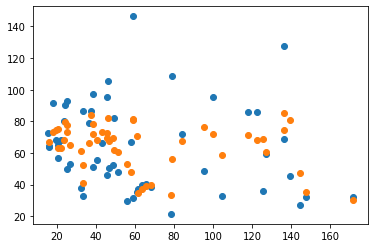

In [0]:
plt.scatter(houseroll['salepr17'],houseroll['crime16'], marker='o')
plt.scatter(houseroll['salepr17'],houseroll['Rolling'], marker='o')

In [0]:
lib_crime = final.filter(['CSA2010','libcard17','crime16'])
lib_crime.describe()

,libcard17,crime16
count,54.000000,54.000000
mean,271.273934,63.642239
std,72.067633,27.241435
min,74.743418,21.482277
25%,228.015165,39.813410
50%,270.801784,61.800291
75%,321.035767,84.772787
max,411.119239,146.465564


In [0]:
lib_crime['libcard17'] = lib_crime['libcard17'].transform(func=(lambda x:x/7.7))

Text(0.5, 1.0, 'Library Card Sort')

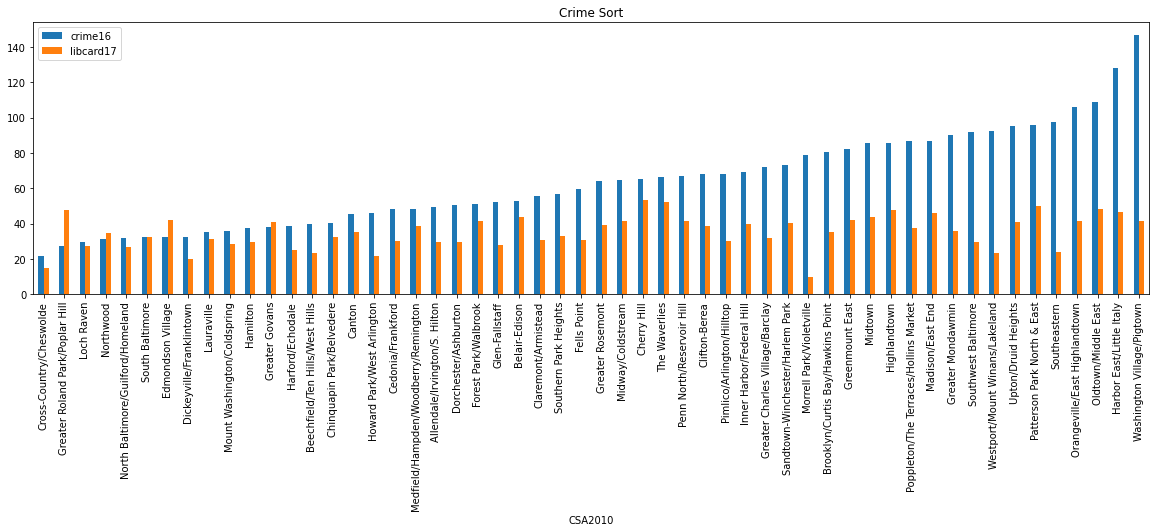

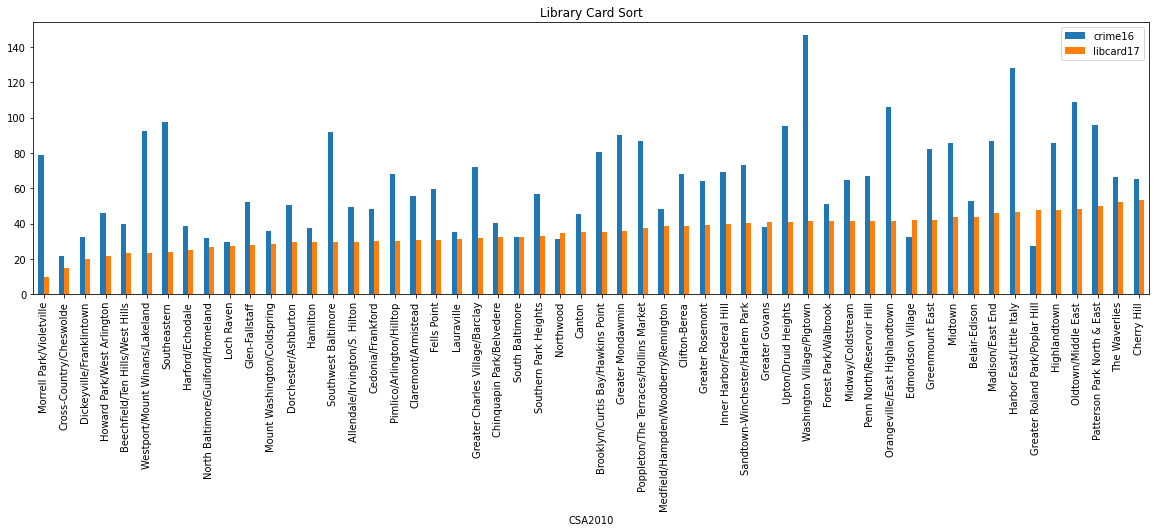

In [0]:
lib_crime.sort_values('crime16').plot.bar(x='CSA2010',y=['crime16','libcard17'], figsize=(20,5)).set_title('Crime Sort')
lib_crime.sort_values('libcard17').plot.bar(x='CSA2010',y=['crime16','libcard17'], figsize=(20,5)).set_title('Library Card Sort')

In [0]:
libroll = lib_crime.sort_values(by='libcard17')
libroll['Rolling']= libroll.iloc[:,2].rolling(window=3).mean()

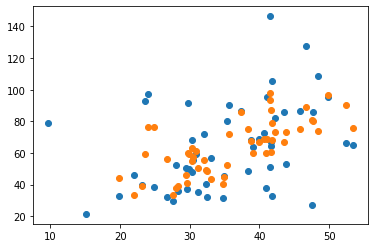

In [0]:
plt.scatter(libroll['libcard17'],libroll['crime16'], marker='o')
plt.scatter(libroll['libcard17'],libroll['Rolling'], marker='o')